In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

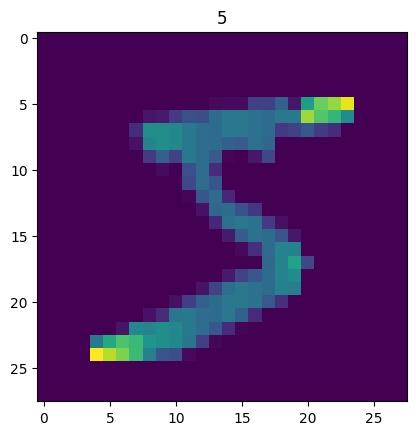

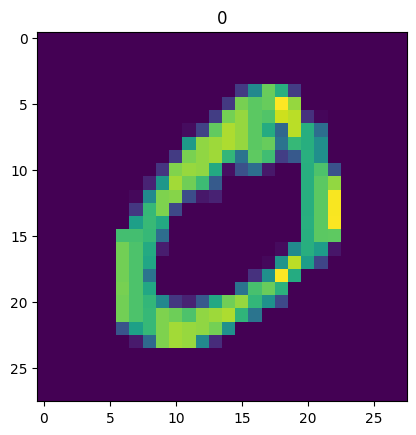

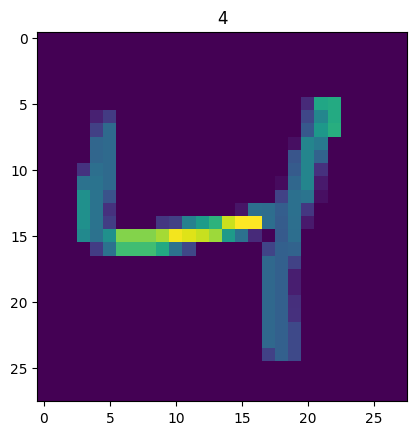

In [42]:
import matplotlib.pyplot as plt

def show_images(x_train):
  plt.imshow(x_train)
  plt.title(y_train[i])
  plt.show()


for i in range(3):
  show_images(x_train[i])

cmap.binary
- plt.cm.binary is a colormap in Matplotlib that maps values between 0 and 1 to black and white colors. It is commonly used for visualizing grayscale images.
-  lower values (closer to 0) are mapped to black, while higher values (closer to 1) are mapped to white.

In [ ]:
plt.imshow(x_train[5])
plt.show
plt.imshow(x_train[5],cmap=plt.cm.binary)

In [ ]:
y_train[5]

Normalize
- A preprocessing technique used to scale the pixel values of images to a range between 0 and 1.


In [ ]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
x_train[5]

Reshaping
- Reshapes the input image data arrays x_train and x_test into 4D arrays suitable for feeding into a convolutional neural network (CNN).
- reshape(-1, IMG_SIZE, IMG_SIZE, 1): This reshapes the 2D array of images into a 4D array suitable for convolutional neural networks.

- -1 is used to infer the size of the first dimension (i.e., the number of samples),
IMG_SIZE is the height and width of each image,
- 1 indicates that the images are grayscale, so there is only one channel. If the images were in color (RGB), this value would be 3.

In [ ]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
from keras.models import Sequential
from keras.layers  import (
    Activation,
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
)

model = Sequential()

# 1st conv layer 0,1,2,3,4 (60000,28,28,1) 28-3+1= 26*26
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

In [ ]:
model_path="d:/Programiz/python/Tensorflow/Digit_Recognition/model.h5"
model.save(model_path)

In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000:", test_loss)
print("Test Accuracy:", test_acc)


In [ ]:
prediction=model.predict(x_testr)
prediction

In [ ]:
print(np.argmax(prediction[77]))

In [ ]:
plt.imshow(x_testr[77])

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#load model
model = tf.keras.models.load_model(model_path)

# Load the image
two = cv2.imread("6.png")
two_gray = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)

# Preprocess the image
resize = cv2.resize(two_gray, (28, 28), interpolation=cv2.INTER_AREA)
two_scaling = tf.keras.utils.normalize(resize, axis=1)
two_cov = np.array(two_scaling).reshape(-1,28, 28, 1)

# Predict the number
pre = model.predict(two_cov)
pre_label = np.argmax(pre)
print(pre_label)

# Display the result
plt.imshow(two)
plt.title(f"Predicted Label: {pre_label}")
plt.show()

In [ ]:
import os
print(os.getcwd())
